In [32]:
# Langkah 1: Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [33]:
# Langkah 2: Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Langkah 3: Memuat dataset
file_path = '/content/drive/MyDrive/DATASET/wine.data'  # Ganti dengan path dataset Anda
# Kolom pada dataset wine
columns = [
    'Class',
    'Alcohol',
    'Malic_Acid',
    'Ash',
    'Alcalinity_of_Ash',
    'Magnesium',
    'Total_Phenols',
    'Flavanoids',
    'Nonflavanoid_Phenols',
    'Proanthocyanins',
    'Color_Intensity',
    'Hue',
    'OD280/OD315_of_Diluted_Wines',
    'Proline'
]

# Memuat dataset ke dalam DataFrame
df = pd.read_csv(file_path, header=None, names=columns)

In [35]:
# Langkah 4: Menampilkan informasi awal dataset
print("Informasi Dataset:")
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_Phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_Diluted_Wines  178 non-null   

In [36]:
# Langkah 5: Exploratory Data Analysis (EDA)

# Cek jumlah data kosong
print("\nJumlah Nilai Kosong per Kolom:")
print(df.isnull().sum())

# Cek distribusi kelas
print("\nDistribusi Kelas:")
print(df['Class'].value_counts())


Jumlah Nilai Kosong per Kolom:
Class                           0
Alcohol                         0
Malic_Acid                      0
Ash                             0
Alcalinity_of_Ash               0
Magnesium                       0
Total_Phenols                   0
Flavanoids                      0
Nonflavanoid_Phenols            0
Proanthocyanins                 0
Color_Intensity                 0
Hue                             0
OD280/OD315_of_Diluted_Wines    0
Proline                         0
dtype: int64

Distribusi Kelas:
Class
2    71
1    59
3    48
Name: count, dtype: int64


<ipython-input-37-86140d9d8c4a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


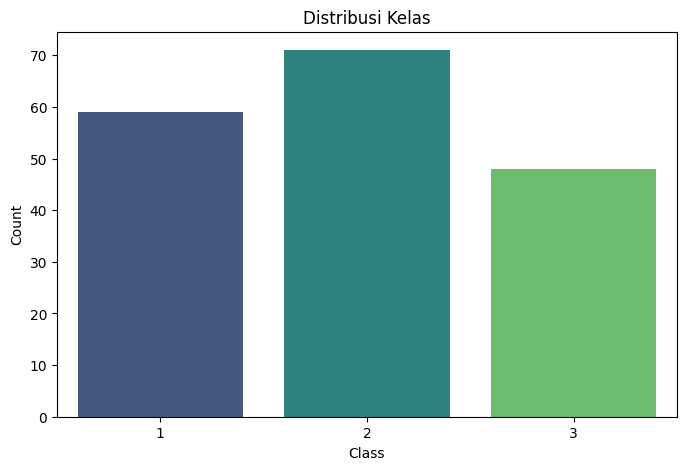

In [37]:
# Visualisasi distribusi kelas
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Distribusi Kelas')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

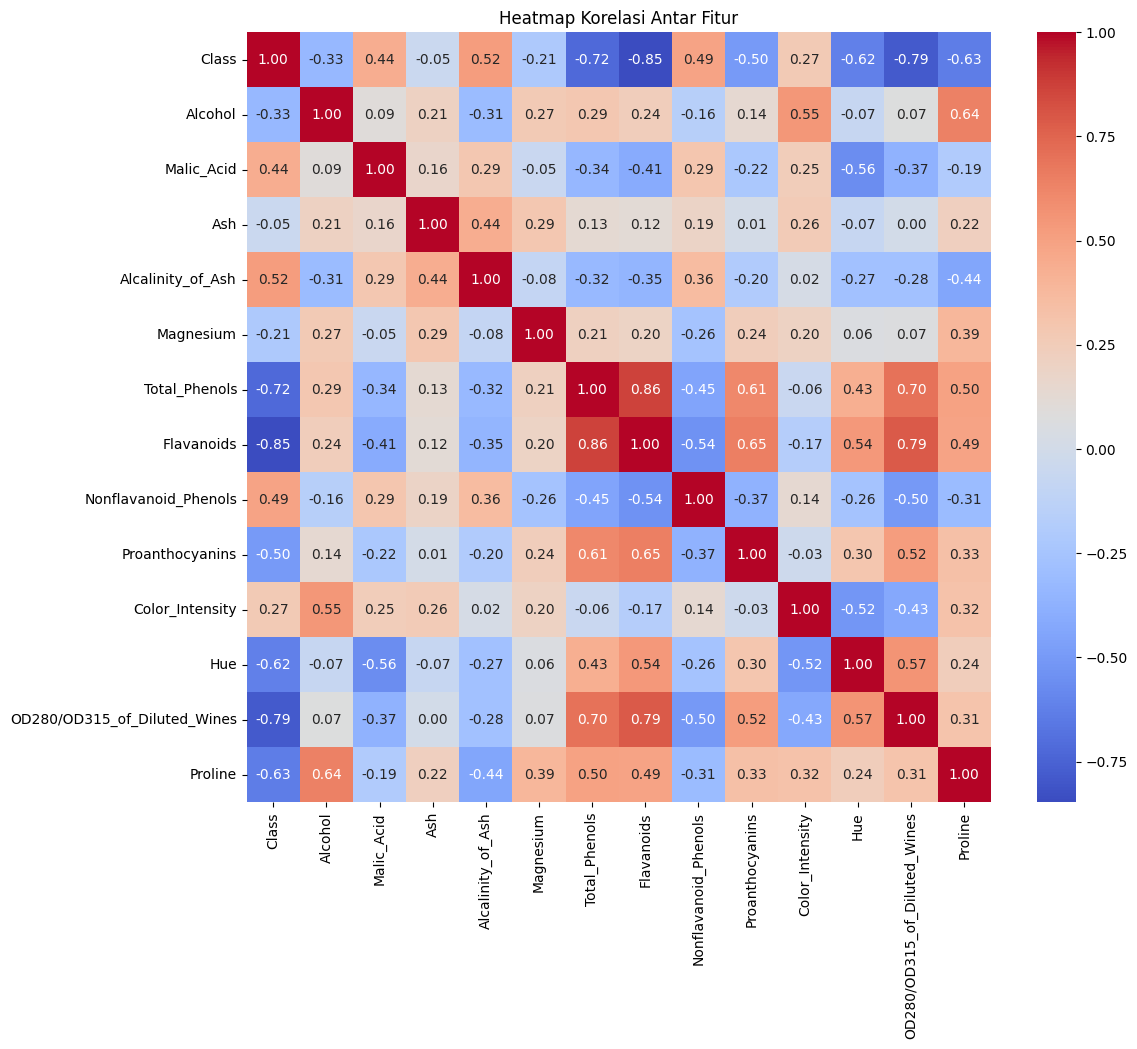

In [38]:
# Cek korelasi antar fitur
correlation_matrix = df.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

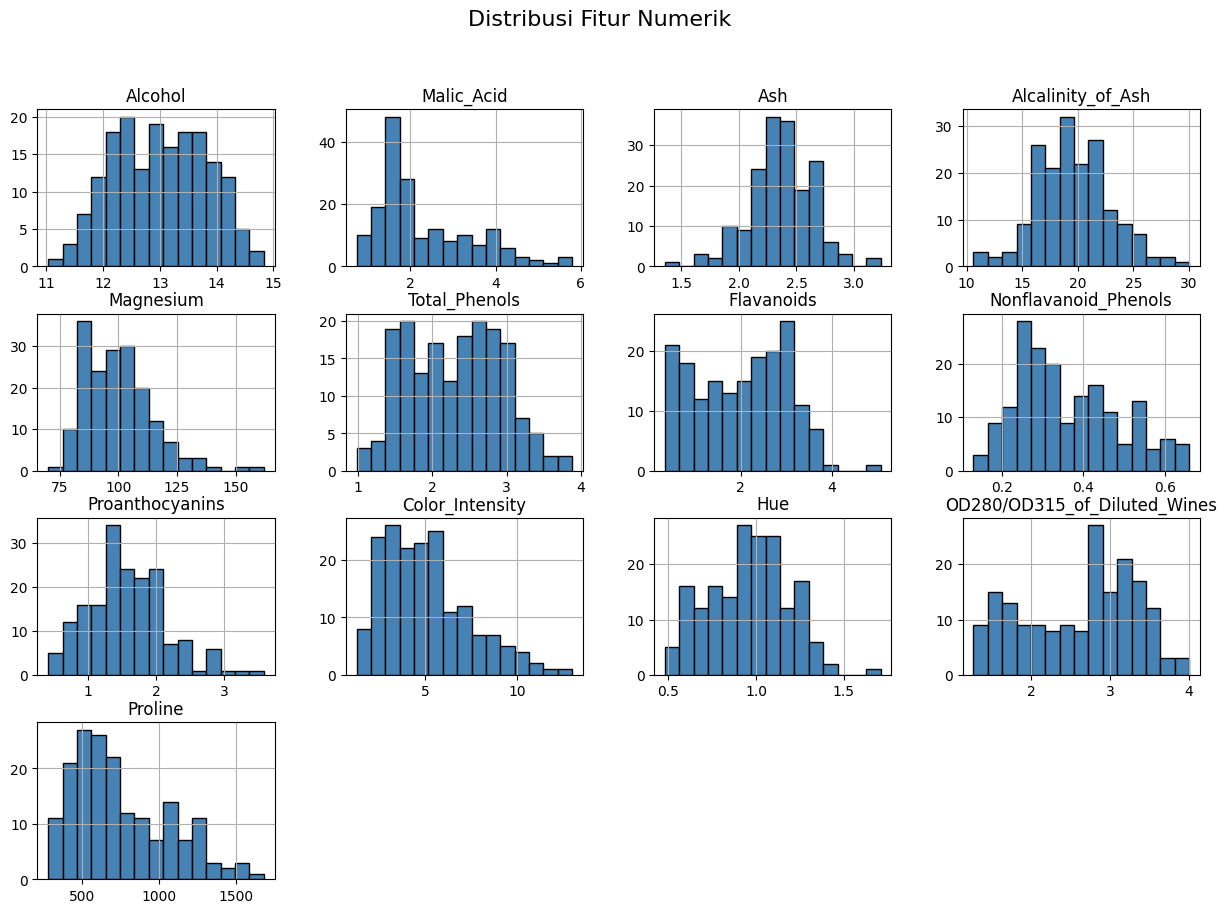

In [39]:
# Visualisasi distribusi fitur numerik
numerical_features = columns[1:]
df[numerical_features].hist(bins=15, figsize=(15, 10), color='steelblue', edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.show()

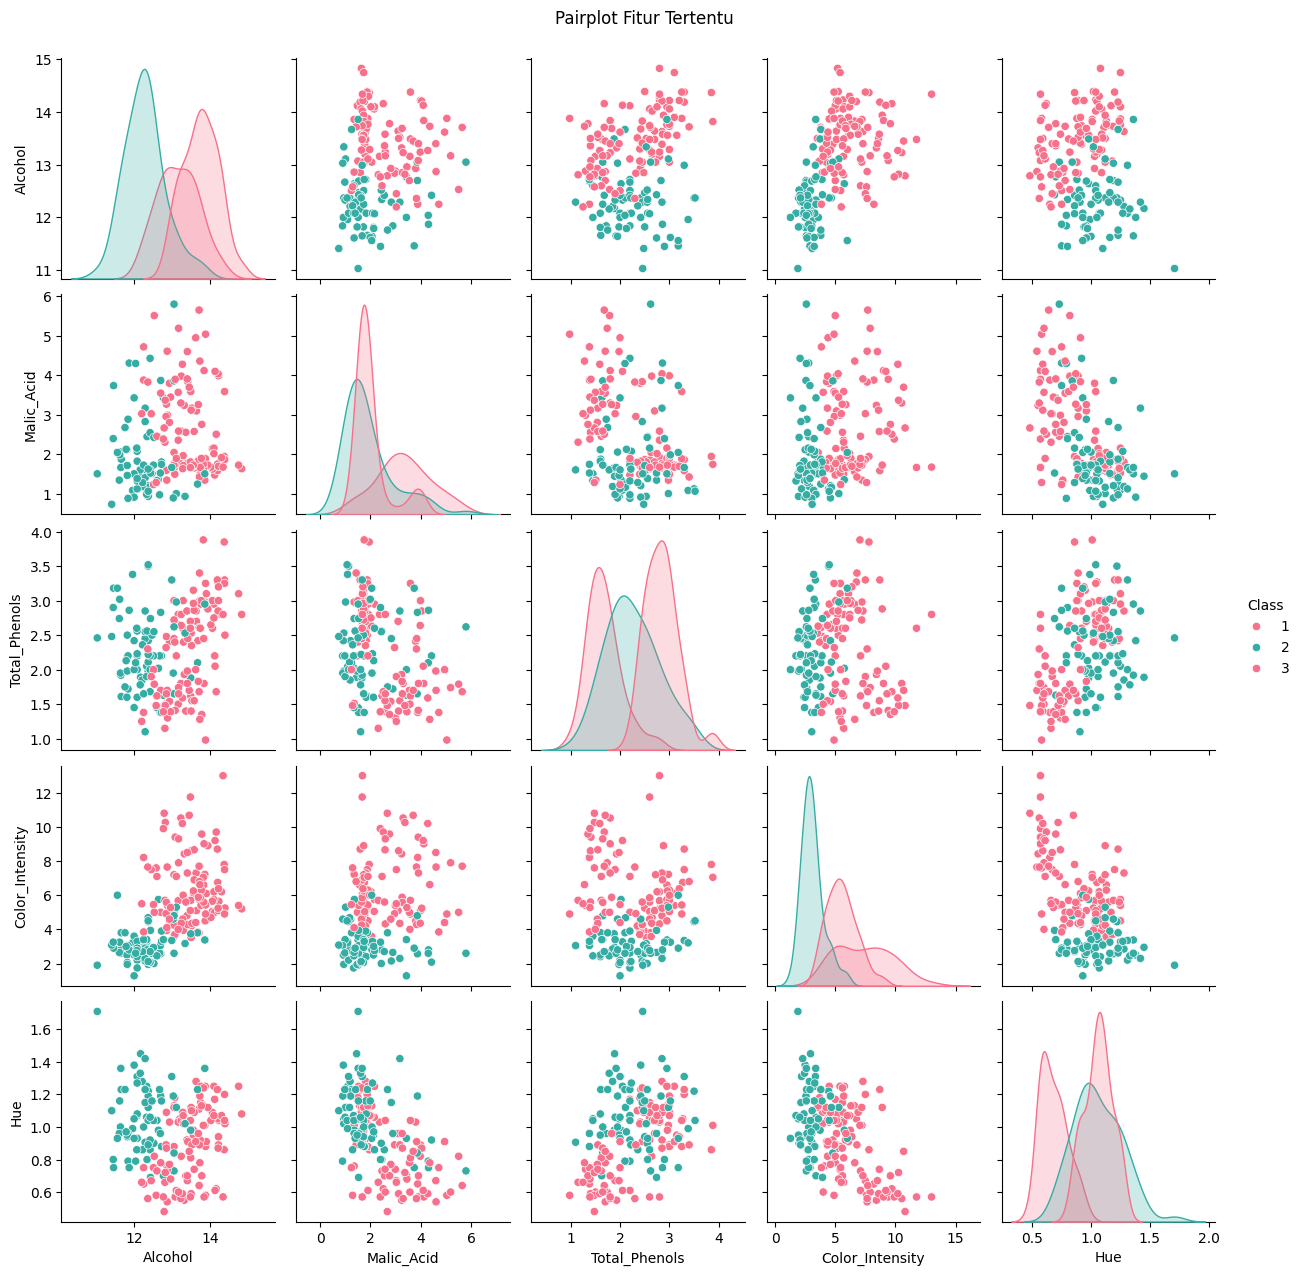

In [40]:
# Pairplot untuk fitur tertentu
selected_features = ['Alcohol', 'Malic_Acid', 'Total_Phenols', 'Color_Intensity', 'Hue']
sns.pairplot(df[selected_features + ['Class']], hue='Class', palette='husl')
plt.suptitle('Pairplot Fitur Tertentu', y=1.02)
plt.show()

<ipython-input-41-6d7dcf8acc14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Alcohol', data=df, palette='Set2')


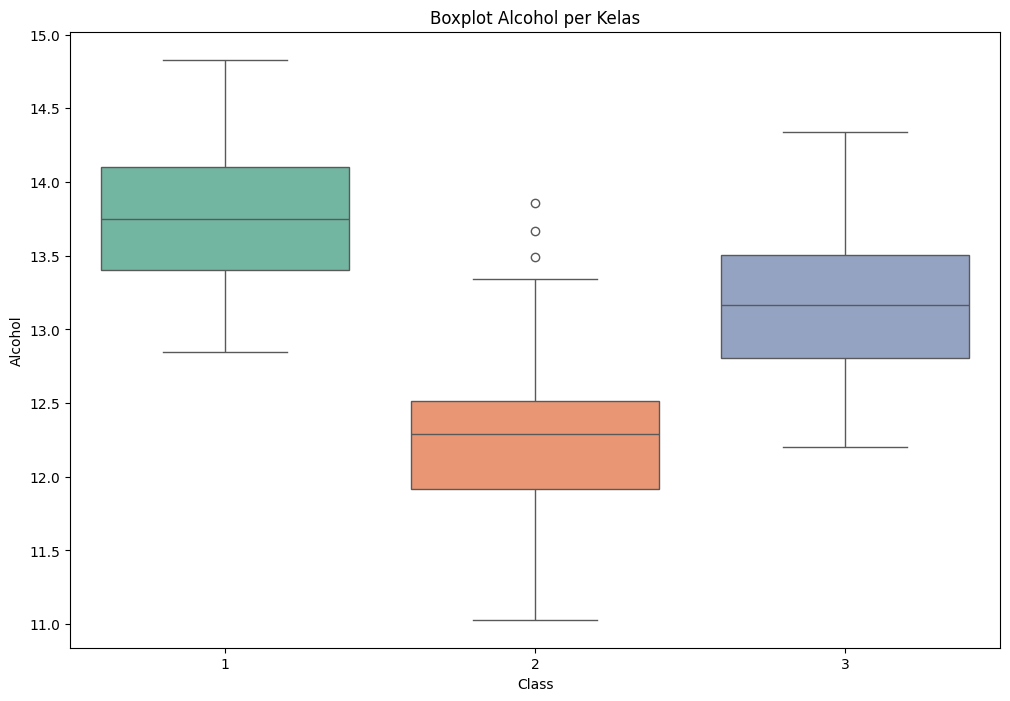

In [41]:
# Visualisasi boxplot per kelas
plt.figure(figsize=(12, 8))
sns.boxplot(x='Class', y='Alcohol', data=df, palette='Set2')
plt.title('Boxplot Alcohol per Kelas')
plt.show()

In [42]:
# Langkah 7: Memisahkan fitur dan target
X = df.drop('Class', axis=1)  # Semua fitur
y = df['Class'] - 1           # Target/label, disesuaikan agar kelas mulai dari 0

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
# Langkah 8: Membuat pipeline untuk setiap model
pipelines = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "Decision Tree": Pipeline([
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    "k-NN": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]),
    "XGBoost": Pipeline([
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
    ])
}


Model: Logistic Regression
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



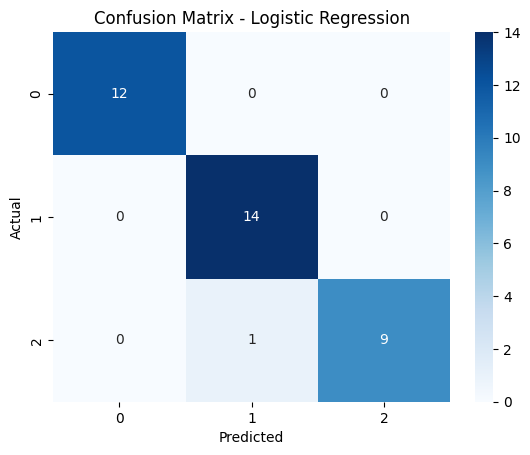


Model: Decision Tree
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



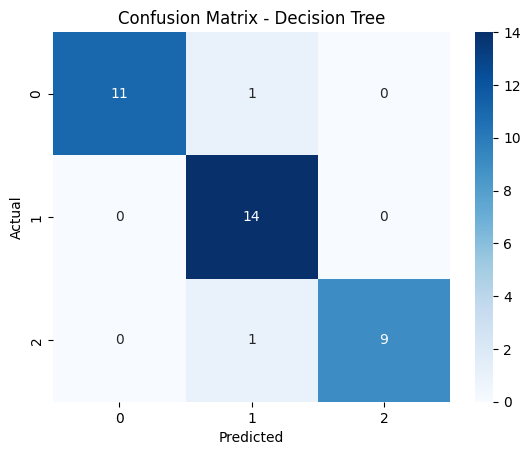


Model: k-NN
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



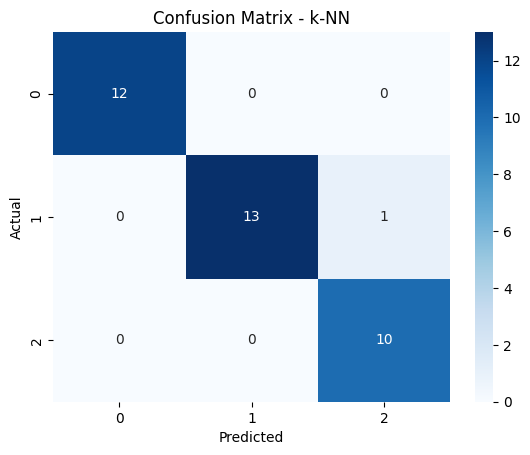


Model: XGBoost
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:28:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


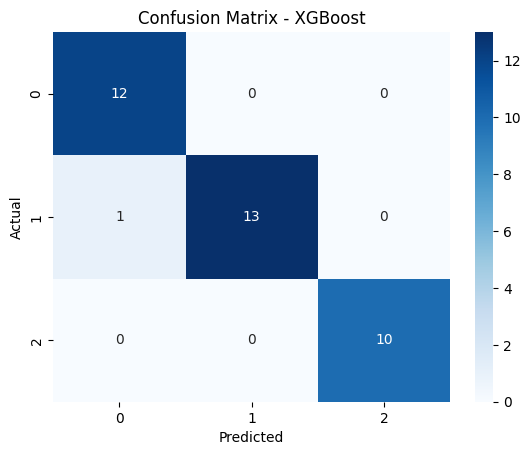

In [44]:
# Langkah 9: Melatih dan mengevaluasi model
results = {}

for name, pipeline in pipelines.items():
    print(f"\nModel: {name}")

    # Latih model
    pipeline.fit(X_train, y_train)

    # Evaluasi model
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [45]:
# Langkah 10: Membandingkan hasil model
print("\nPerbandingan Akurasi:")
for model, acc in results.items():
    print(f"{model}: {acc:.2f}")


Perbandingan Akurasi:
Logistic Regression: 0.97
Decision Tree: 0.94
k-NN: 0.97
XGBoost: 0.97



Hyperparameter Tuning untuk Logistic Regression...
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
175 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/py

Model terbaik untuk Logistic Regression:
{'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Akurasi terbaik (CV): 0.99

Hyperparameter Tuning untuk Decision Tree...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Model terbaik untuk Decision Tree:
{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}
Akurasi terbaik (CV): 0.92

Hyperparameter Tuning untuk k-NN...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model terbaik untuk k-NN:
{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Akurasi terbaik (CV): 0.99

Hyperparameter Tuning untuk XGBoost...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:35:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model terbaik untuk XGBoost:
{'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.6}
Akurasi terbaik (CV): 0.99

Evaluasi Model Terbaik di Data Uji:

Model: Logistic Regression
Akurasi di data uji: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



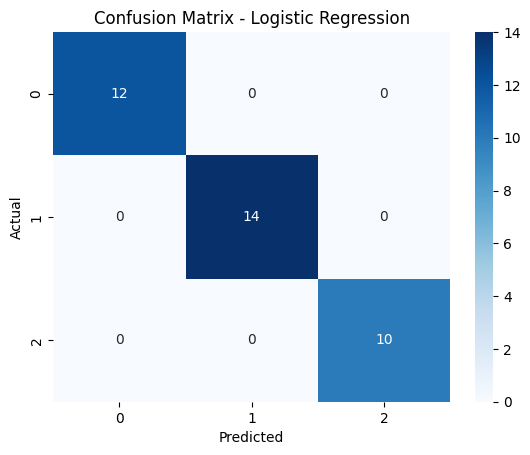


Model: Decision Tree
Akurasi di data uji: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



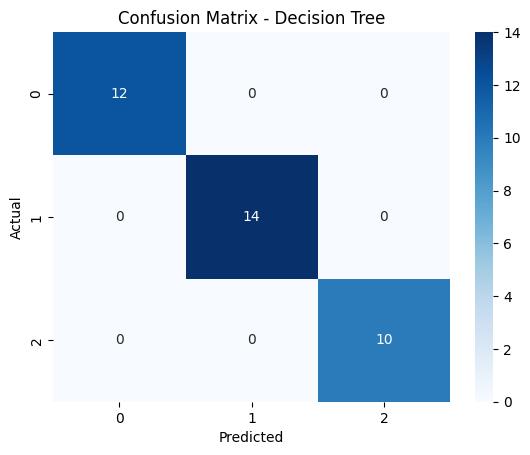


Model: k-NN
Akurasi di data uji: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



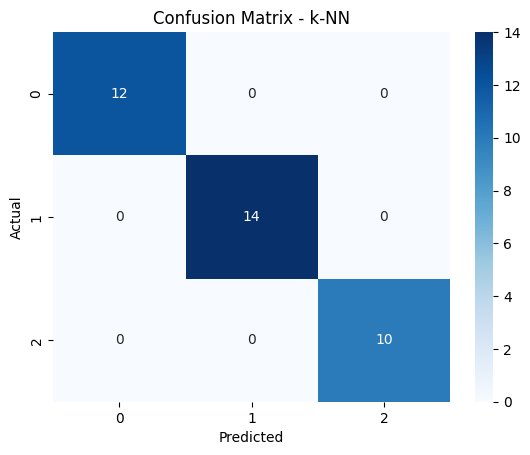


Model: XGBoost
Akurasi di data uji: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



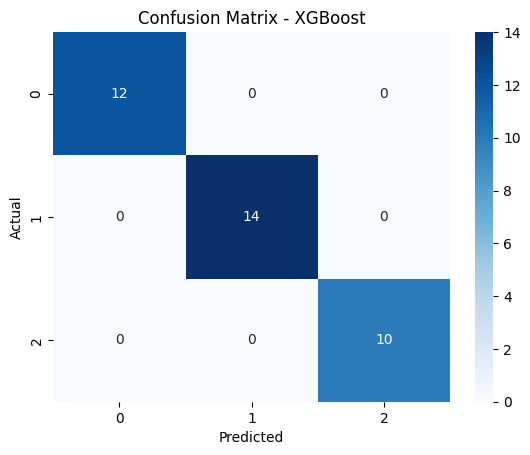

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Hyperparameter untuk setiap model
param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
        'classifier__solver': ['lbfgs', 'liblinear', 'saga']
    },
    "Decision Tree": {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 5]
    },
    "k-NN": {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
    },
    "XGBoost": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7, 10],
        'classifier__subsample': [0.6, 0.8, 1.0],
        'classifier__colsample_bytree': [0.6, 0.8, 1.0]
    }
}

# Tuning setiap model
best_models = {}
for name, pipeline in pipelines.items():
    print(f"\nHyperparameter Tuning untuk {name}...")

    # Pilih parameter grid untuk model
    param_grid = param_grids[name]

    # Inisialisasi GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

    # Cari parameter terbaik
    grid_search.fit(X_train, y_train)

    # Simpan model terbaik
    best_models[name] = grid_search.best_estimator_

    print(f"Model terbaik untuk {name}:")
    print(grid_search.best_params_)
    print(f"Akurasi terbaik (CV): {grid_search.best_score_:.2f}")

# Evaluasi model terbaik di data uji
print("\nEvaluasi Model Terbaik di Data Uji:")
for name, model in best_models.items():
    print(f"\nModel: {name}")

    # Prediksi di data uji
    y_pred = model.predict(X_test)

    # Evaluasi
    acc = accuracy_score(y_test, y_pred)
    print(f"Akurasi di data uji: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
